<a href="https://colab.research.google.com/github/katrin2202/ML-in-forecasting-tasks/blob/main/%D0%B4%D0%BE%D0%BA%D0%BB%D0%B0%D0%B48_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лекция 9. Ящик с усами. 5-числовая сводка. Сравнение с гистограммами

Один из классиков анализа данный американский математик Джон Тьюки.

5-числовая сводка основана на медиане, минимум максимум.

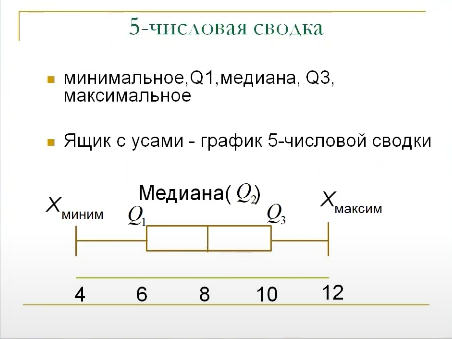

Ящики с усами дублируют гистограмму

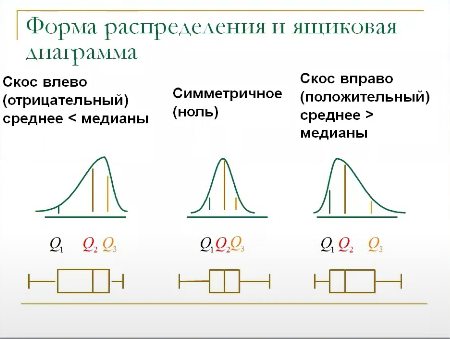

Если набор данных бимодальный. 


---


Если наибольшую частоту имеют 2 значения выборки, выборочное распределение называется **бимодальным**


---


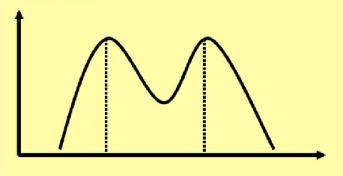

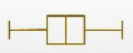

Тогда ящик с усами будет неотличим от центрального случая. Если бугорки разной высоты, то будет неотличим от правого или левого варианта.

Поэтому если гистограмма у нас бимодальная, то ящик с усами нам этого не покажет.

Бимодальные гистограммы показывают что данные составленны из 2 или больше частей. Это нам подсказывает, что данные требуется разделить.

Ящики с усами позволяют нам сравнивать делают, то где сбоит гистограмма.
С помощью ящика с усами хорошо сравнивать распределения 

Например, продажи 5 магазинов нашей сети за 4 месяца. Магазины все примерно одинаковой площади и примерно на таком же растоянии от метро, в точности одинаковый ассортимент.

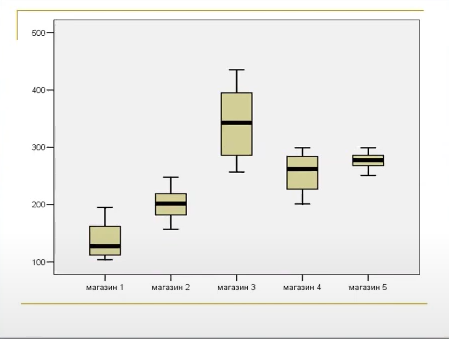

#### Вопросы:
1) Менеджер какого магазина может рассылать свое резюме?

2) Менеджер какого магазина уже может думать как потратит свою премию?

3) Кто еще может получить премию?

Ответ:
1) Менеджер первого магазина можем уволить, так как даже в самый лучший день продаж показатель ниже чем в других магазинах 

2) менеджер 3 магазина, так как показатели самые высокие в сравнении

3) менеджер 5 магазина, так как у него самые стабильные продажи

#### Важно

Строить один ящик с усами бессмысленно, тогда лучше строить гистограмму. Но если Вы хотите сравнить несколько выборок, показать различие в них, то ящик с усами лучшее оружие для этого.

#### Подготовка данных с предыдущих лекций

In [39]:
#@title Подключаем бибилиотеки
import pandas as pd
import numpy as np

In [40]:
#@title Читаем и выводим данные
AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
AH.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [41]:
#@title Подключим библиотеки для графиков
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

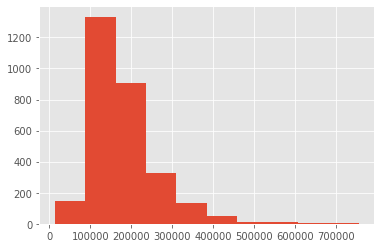

In [42]:
#@title Столбчатая диаграмма цены дома
AH['SalePrice'].hist();

In [44]:
#@title Подключим библиотеки для гистораммы
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist

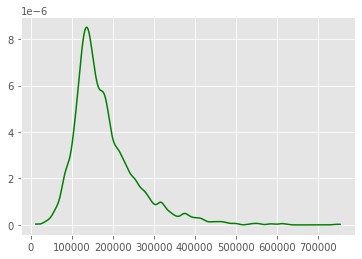

In [46]:
#@title Построим гистограмму 
my_density = gaussian_kde(AH['SalePrice'], bw_method = 0.1)
x = linspace(min(AH['SalePrice']), max(AH['SalePrice']),1000)
plot(x, my_density(x),'g') # distribution function
show()

#### Вернемся к лекции

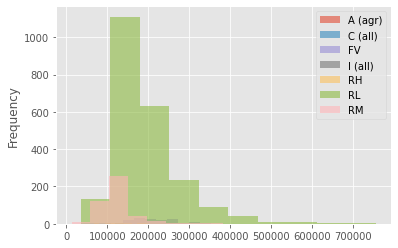

In [47]:
#@title Построим диаграмму стоимости в зависимости от района 
AH.groupby('MS Zoning')['SalePrice'].plot.hist(alpha=0.6)
# Добавляем легенду
plt.legend();

Как видим проанализировать такую диаграмму практически невозможно так как данные друг на друге. 

**Районы:**

A(agr) - сельскохозяйственный

C(all) - коммерческий

FV - дом - корабль

I(all) - промышленный

RH - 

RL - жилой район пониженной плотности

RM - 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

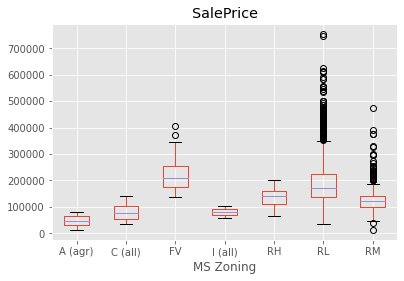

In [48]:
ax = AH.boxplot(column = "SalePrice", by = "MS Zoning")

ax.get_figure().suptitle("")

In [50]:
#@title Типичная ошибка при построении ящика с усами. Это построение на данных которых очень мало
print (AH['MS Zoning'].value_counts())

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


(-0.5, 9.5, 0.0, 800000.0)

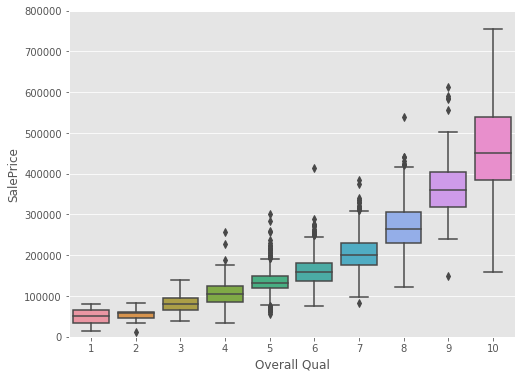

In [52]:
#@title Как влияет состояние дома на его стоимость?
import seaborn as sns

var = 'Overall Qual'
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = AH[var], y = AH['SalePrice'])
fig.axis(ymin=0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text major ticklabel objects>)

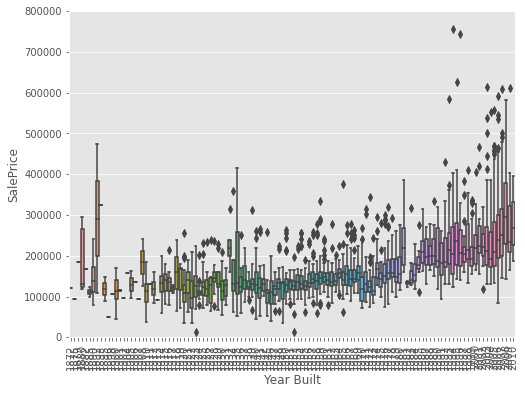

In [55]:
#@title Как влияет возрас дома на его стоимость?
var = 'Year Built'
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = AH[var], y = AH['SalePrice'])
fig.axis(ymin=0, ymax = 800000)
plt.xticks(rotation=90)

По сравнению с качеством дома, возраст не на столько влияет на стоимость

#### Про выбросы

Усик тянется до максимального близкого значения 1,5 длины ящика. 

Если максимум раньше это длины, то рисуем усик для максимума. 

Если максимум находится дальше, учик рисуем до 1,5 длины ящика.

Далее рисуем кружочки - выбросы. Кружочки рисуем до 3 длин ящика от самого ящика. 

Далее пойдут звездочки - супер выбросы. В питоне данной реализации нет.

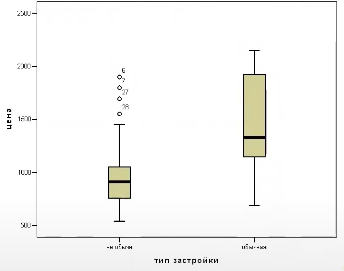

Все кружочки надо убирать? 

Это не правильная тактика, кружочки это кандидаты на выброс и с каждым нужно отдельно разбираться.

# Лекция 10. Типичное значение выборки. Применение среднее арифметического. Нормальное распределение.

Данные для анализа. Перепись население в 1959 году в городах России. Население записано в тысячах

In [61]:
#@title Подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')
%matplotlib inline

In [59]:
town = pd.read_csv('town_1959.txt', sep=",", header = 0, index_col=u'номер')
town.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


Цель нашего анализа ответить на вопрос:
Какого население типичного города России в 1959 году?

In [63]:
#@title Обязательная статистика
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


Среднее занчение = 52,925199

Медиана = 19,25

Что выбрать в качестве типичного значения?

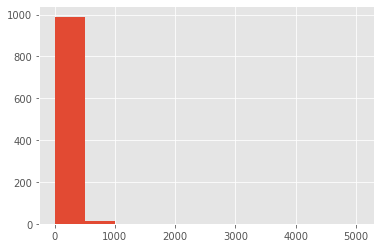

In [64]:
#@title Построим гистограмму
town[u'население'].hist()

Справа не просто пустота, там настолько маленькое количество городов, что столбца просто не видно.

Гистограмма всегда помогает, но в этой задаче экстремальное значение слишком высокое. 

Возможно это выброс

Удалим Москву и Санкт-Петербург

In [70]:
town_2 = town.iloc[2:1004, 1]
town_2.describe()

count    1002.000000
mean       44.997904
std        91.645867
min         0.100000
25%        10.700000
50%        19.150000
75%        37.550000
max       941.000000
Name: население, dtype: float64

Среднее значнеи = 44,997904

In [67]:
print("Среднее значение уменьшилось на ", (52.925199 - 44.997904)/55.925199)

Среднее значение уменьшилось на  0.1417481768817667


In [68]:
#@title Какой процент наблюдений меньше среднего значения?
len(town[town['население'] < 52.925199])/len(town)*100

82.37051792828686

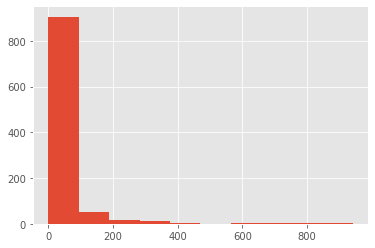

In [76]:
#@title Построим гистограмму для сокращенного набора
town_2.hist()

Выплыли следующие выбросы. Мы же не будем удалять их до бесконечноси

Когда график не помогает, что делать?

Заметим, что распределение похоже на логнормальное

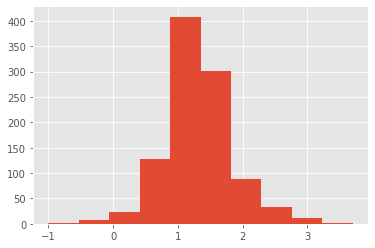

In [78]:
#@title Гистограмма для логарифмов
x = np.log10(town[u'население'])
pd.Series(x).hist()

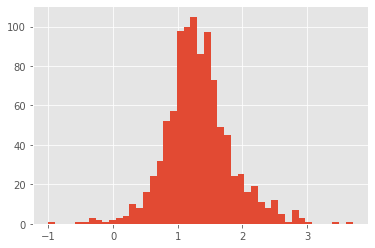

In [80]:
#@title Повторим увеличив число столбцов
pd.Series(x).hist(bins=45)

#### Вопрос
Давайте теперь посмотрим выбросы. Сколько их?

Москва, Питер и город с самым маленьким населением 

### Сравнение гистограмм, ядерных оценок плотности и плотностей распределения

In [81]:
import scipy.stats as stats

Построим 3 грифика плотности: нормальное распределение, отличающиеся математическими ожиданиями и дисперсиями

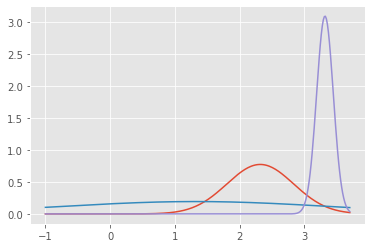

In [82]:
mu = np.mean(x)
sigma = np.std(x)

x_l = np.linspace(np.min(x), np.max(x), 300)

plt.plot(x_l, stats.norm.pdf(x_l, mu+1, sigma))
plt.plot(x_l, stats.norm.pdf(x_l, mu, 4*sigma))
plt.plot(x_l, stats.norm.pdf(x_l, mu+2, sigma/4))

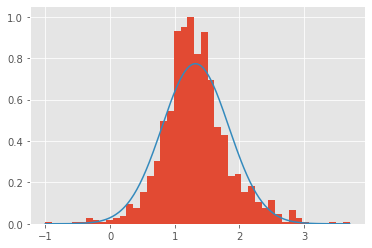

In [84]:
#@title Наложили нормальное распределение на наши данные
pd.Series(x).hist(bins=45, density=1)
plt.plot(x_l, stats.norm.pdf(x_l, mu, sigma))

Синяя полоска это нормальное распределение. Есть отклонения от нормального распределения. Часть из них существенна, а часть нет.

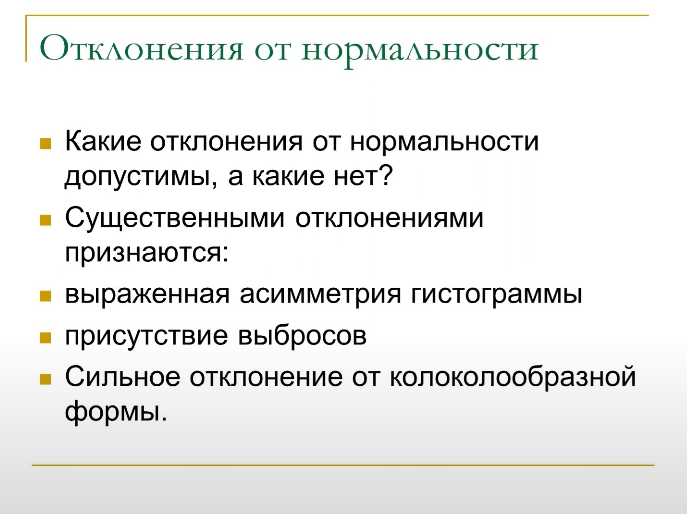

Мы можем действовать так как будто у нас нормальное распределение если у нас нет существенных отклонений.

# Лекция 11. Упражнения на интерпретацию гистограмм. Успражнения на интерпретацию ящиков с усами